Clustering trova il gruppo di appartenenza di una certa combinazione di variabili indipendenti.

Corrisponde a "creare" una variabile dipendente rappresentant appunto il gruppo. Questa variabile dipendente non si conosce, non è presente nel dataset iniziale.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Tutte le colonne sono features. La prima colonna (Customer ID), è totalmente irrilevante, per cui si deve eliminare.

X_slim utilizza solo due features per poter creare un grafico 2D.

In [20]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, 1:].values
X_slim = dataset.iloc[:, [3,4]].values

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Provo diversi numeri di cluster e calcolo il WCSS per computare il suo grafico e decidere il numero k ottimale.

Il metodo di inizializazione k-mean++ permette di evitare la "trappola" dell'inizializzazione casuale.

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  c = KMeans(n_clusters=i, init="k-means++")
  c.fit(X)
  wcss.append(c.inertia_)

wcss_slim = []
for i in range(1,11):
  c = KMeans(n_clusters=i, init="k-means++")
  c.fit(X_slim)
  wcss_slim.append(c.inertia_)

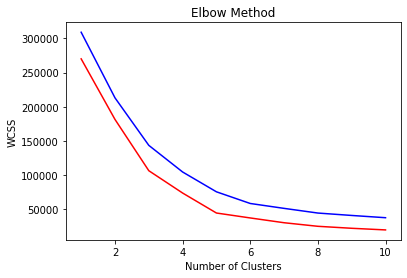

In [23]:
plt.plot(range(1,11), wcss, color="blue")
plt.plot(range(1,11), wcss_slim, color="red")

plt.title("Elbow Method")
plt.ylabel("WCSS")
plt.xlabel("Number of Clusters")
plt.show()

Il numero ottimale di k è 5 per il dataset ridotto. Per il dataset intero potrebbe essere anche 6.

In [24]:
kmeans = KMeans(n_clusters=5, init="k-means++")
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

kmeans_slim = KMeans(n_clusters=5, init="k-means++")
y_kmeans_slim = kmeans_slim.fit_predict(X_slim)
print(y_kmeans_slim)

[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 4 1 3 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 3 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]
[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


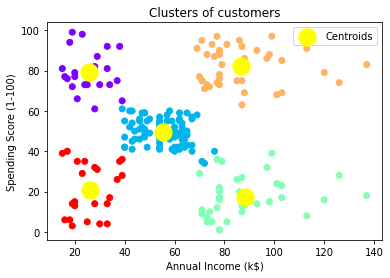

In [27]:
plt.scatter(X_slim[:,0] , X_slim[:,1] , c=y_kmeans_slim , cmap='rainbow')
plt.scatter(kmeans_slim.cluster_centers_[:, 0], kmeans_slim.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()